In [47]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from scipy import spatial
from tensorflow.keras.preprocessing.image import load_img

8.1 Prepare features

- Prepare main image feature

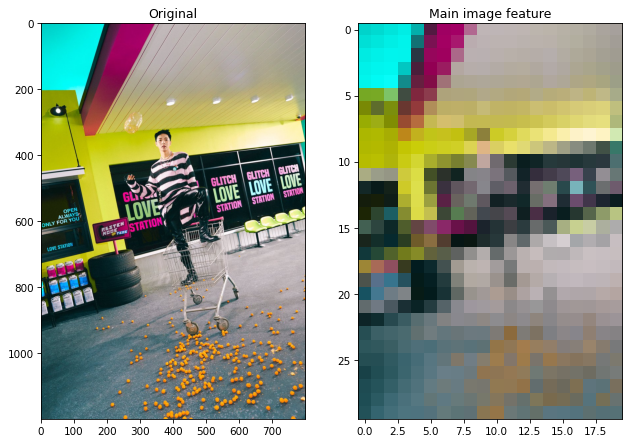

In [48]:
#Load main image and convert BGR to RGB
main_image = cv2.cvtColor(cv2.imread("main-img\image2.jpg"),cv2.COLOR_BGR2RGB)

#Define tile size
height = 40
width = 40
tile_size = (height,width)


# Create main image feature grid of subimage
main_image_feature =np.zeros((int(main_image.shape[0]/height),int(main_image.shape[1]/width),3),dtype=np.uint32)
# Calculate average (mean) color of each subimage with tile_size
for i in range(main_image_feature.shape[0]):
    for j in range(main_image_feature.shape[1]):
        main_image_feature[i,j] = main_image[i*tile_size[0] : (i+1)*tile_size[0], j*tile_size[1]: (j+1)*tile_size[1]].mean(axis=(0,1))

#Display main image and main image feature
fig, ax = plt.subplots(1,2, figsize=(10,10),dpi = 75) 
fig.patch.set_facecolor('white')
ax[0].set_title('Original')
ax[0].imshow(main_image)
ax[1].set_title('Main image feature')
ax[1].imshow(main_image_feature)
plt.savefig("8-1.png",bbox_inches='tight')
plt.show()
        

- Prepare tile images and features

In [49]:
# Collect filenames of all tile images
All_files = glob.glob(f"pexels/**/*.jpg")

# Load tile images and resize to tile_size
tiles = []
for i in range(len(All_files)):
  # Load image files and Resize (h,w,ch) -> h = w < 100 , ch = 3 (R,G,B)
  tile = load_img(All_files[i],target_size = tile_size)
  tiles.append(tile)

# Create array of average (mean) color of each tile image
Tile_features = []
for tile in tiles:
    mean_color = np.array(tile).mean(axis=(0,1))
    Tile_features.append(mean_color)

8.2 Image Clustering and Matching using KNN with KDTree Algorithm

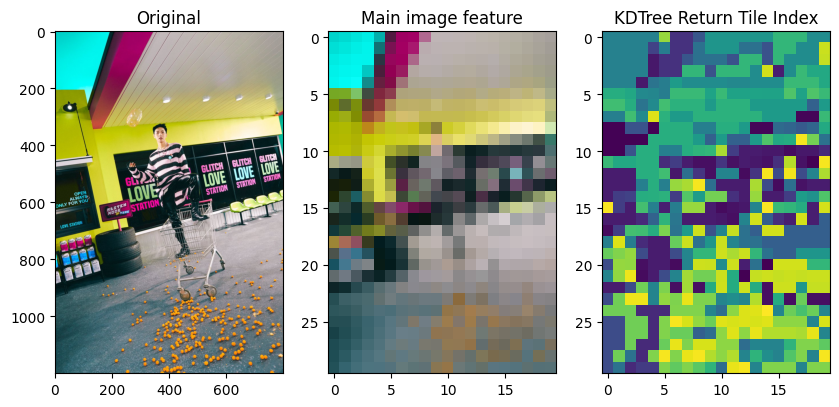

In [50]:
#Create KDTree of tile color features
tree = spatial.KDTree(Tile_features)

#KNN (k=1) search for best matched tiles with each subimage
closest_tiles = np.zeros((main_image_feature.shape[0],main_image_feature.shape[1]),dtype=np.uint32)
for i in range(main_image_feature.shape[0]):
    for j in range(main_image_feature.shape[1]):
        closest = tree.query(main_image_feature[i,j])
        closest_tiles[i, j] = closest[1]

#Display main image, main image feature and Closest tiles
fig2, ax = plt.subplots(1,3, figsize=(10,20),dpi=100) 
fig2.patch.set_facecolor('white')
ax[0].set_title('Original')
ax[0].imshow(main_image)
ax[1].set_title('Main image feature')
ax[1].imshow(main_image_feature)
ax[2].set_title('KDTree Return Tile Index')
ax[2].imshow(closest_tiles)
plt.savefig("8-2.png",bbox_inches='tight')
plt.show()

8.3 Create Image Mosaic

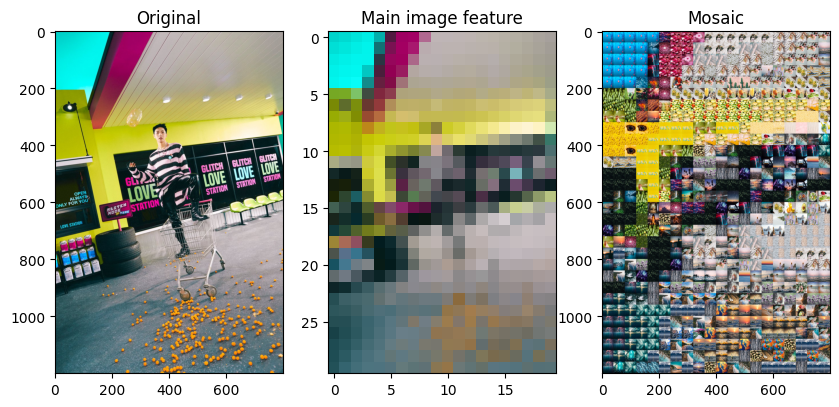

In [51]:
# Fill each subimage with matched tile
# Create an output image
main_photo = np.array(main_image)
for i in range(closest_tiles.shape[0]):
    for j in range(closest_tiles.shape[1]):
        # Offset of tile
        x, y = i*tile_size[0], j*tile_size[1]
        # Index of tile
        index = closest_tiles[i, j]
        #Draw tile
        main_photo[x:(x+tile_size[0]), y:(y+tile_size[1]),:] = tiles[index]

#Display main image, main image feature and       
fig3, ax = plt.subplots(1,3, figsize=(10,20), dpi = 100 )
fig3.patch.set_facecolor('white')
ax[0].set_title('Original')
ax[0].imshow(main_image)
ax[1].set_title('Main image feature')
ax[1].imshow(main_image_feature)
ax[2].set_title('Mosaic')
ax[2].imshow(main_photo)
plt.savefig("8-3.png",bbox_inches='tight')
plt.show()